# 不等流計算

## 課題

1. 反復法をニュートン法から二分法に変更して計算して下さい。
    - [二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)
    - [ニュートン法](https://ja.wikipedia.org/wiki/%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%88%E3%83%B3%E6%B3%95)
1. 反復法をscipyパッケージに含まれるモジュールで置き換えて計算してみて下さい。
    - scipyの二分法:scipy.optimize.bisect：[参考サイト](https://enjoy-analysis.com/python-268/)、[公式](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
    - scipyのニュートン法:scipy.optimize.bisect：[参考サイト](https://tech-market.org/python-newton-method/)、[公式](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)
1. 完全に射流になる計算条件を設定してS2水面形を計算してみて下さい。



### 課題1回答案

 - 二分法のメリット:微分が不要な点
 - 二分法のデメリット:収束が遅い
 

In [43]:
import numpy as np

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.1

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,50.01,dx) #追加距離の配列
zb = L*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #下流端条件

for i in range(1,len(h)):
    hmax = 10
    hmin = hc + 0.0001 # 最小値は限界水深より大きくする。
    f = 1.0
    while np.abs(f) > 10**(-8): # 反復計算の収束条件
        hharf = 0.5*(hmax + hmin)
        f = q**2/2.0/g/hharf**2 + hharf + zb[i] \
          -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
          - 0.5*(q**2*n**2/hharf**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
            
        if f > 0:
            hmax = hharf
        else :
            hmin = hharf
        
    h[i] = hharf

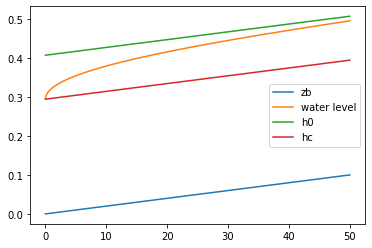

In [44]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

### 課題2回答案

 - パッケージを使うメリット：コーディングが不要、速いことが多い
 - パッケージを使うデメリット：中身がブラックボックス、計算条件で遅くなることがある。

#### ニュートン法
 - 実は微分の値が無くても計算可能 : 内部で数値微分を行ってくれる。

In [45]:
import numpy as np
from scipy import optimize

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.1

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,50.01,dx) #追加距離の配列
zb = L*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #下流端条件
for i in range(1,len(h)):
    f = lambda x : q**2/2.0/g/x**2 + x + zb[i] \
      -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
      - 0.5*(q**2*n**2/x**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
    
    dfdh = lambda x : -q**2/g/x**3 + 1 + 5/3*q**2*n**2/x**(13/3)*dx
    
    h[i] = optimize.newton(f, h[i-1], fprime=dfdh)

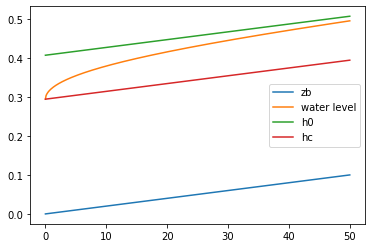

In [46]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

#### 二分法

In [47]:
import numpy as np
from scipy import optimize

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.1

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,50.01,dx) #追加距離の配列
zb = L*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #下流端条件
for i in range(1,len(h)):
    f = lambda x : q**2/2.0/g/x**2 + x + zb[i] \
      -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
      - 0.5*(q**2*n**2/x**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
    
    h[i] = optimize.bisect(f, hc+0.0001 , 10.0)

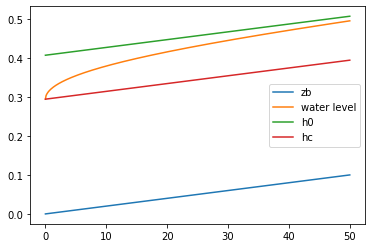

In [48]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

### 課題3回答案

 - S水路の条件はh0<hc
 - 射流では上流から下流に向かって計算する。 
 - 射流の計算は不安定のためdxを小さくとる。

In [80]:
import numpy as np

q = 0.5
n = 0.02
ib = 1/50
g = 9.8
dx = 0.01

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,20.01,dx) #追加距離の配列
zb = L[::-1]*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #上流端条件
for i in range(1,len(h)):
    h[i] = h0 #収束計算の初期値：等流水深
    f = 1.0 #仮値
    dfdh = 1.0 #仮値
    while np.abs(f/dfdh) > 10**(-8): # 反復計算の収束条件
        f = q**2/2.0/g/h[i]**2 + h[i] + zb[i] \
          -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
          + 0.5*(q**2*n**2/h[i]**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
        dfdh = -q**2/g/h[i]**3 + 1 - 5/3*q**2*n**2/h[i]**(13/3)*dx
        h[i] -= f/dfdh

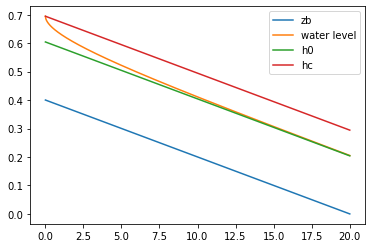

In [81]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

### 課題3：補足
 - M水路の条件でも射流になる場合がある。M3水面形
 - その場合、限界水深の到達した時点で跳水が発生する。連続した計算が難しいため、直前で計算を止めている。

In [38]:
import numpy as np

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.01

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,18.51,dx) #追加距離の配列
zb = L[::-1]*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = 0.1 #上流端条件
for i in range(1,len(h)):
    h[i] = h[i-1] + 0.001   #収束計算の初期値：等流水深
    f = 1.0 #仮値
    dfdh = 1.0 #仮値
    while np.abs(f/dfdh) > 10**(-8): # 反復計算の収束条件
        f = q**2/2.0/g/h[i]**2 + h[i] + zb[i] \
          -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
          + 0.5*(q**2*n**2/h[i]**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
        dfdh = -q**2/g/h[i]**3 + 1 - 5/3*q**2*n**2/h[i]**(13/3)*dx
        h[i] -= f/dfdh

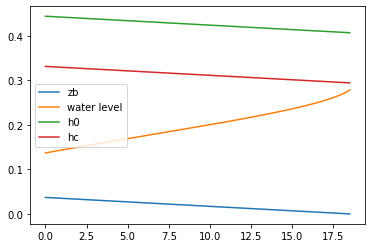

In [39]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画